# Task 1

In [4]:
# EDA.ipynb

import sys
sys.path.append('../src')

from data_quality_check import DataQualityCheck
from connection import PostgresConnection

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import numpy as np

Connected to PostgreSQL database!
   id        date                          post_link   views post_hour  \
0   1  2024-05-21  https://t.me/tikvahethiopia/87794  211354  12:40:51   
1   2  2024-05-17  https://t.me/tikvahethiopia/87693  240558  08:08:16   
2   3  2024-05-14  https://t.me/tikvahethiopia/87636  249862  07:49:21   
3   4  2024-05-10  https://t.me/tikvahethiopia/87532  280144  13:39:46   
4   5  2024-05-07  https://t.me/tikvahethiopia/87496  304225  10:46:34   

                   keyword time_of_day  
0                     None   afternoon  
1  #bank, #bankofabyssinia     morning  
2                    #bank     morning  
3  #bank, #bankofabyssinia   afternoon  
4  #bank, #bankofabyssinia     morning  
Connection closed.


## Load the fetched data into a Pandas DataFrame from postgres database:

### Write SQL queries to extract the relevant data from the dataset:

In [5]:
# Connect to the PostgreSQL database
db = PostgresConnection(dbname='bank', user='postgres', password='Mati@1993')
db.connect()

# Create SQL queries
sql_query = """ SELECT * FROM public.telegram_post """

# Execute SQL query and load data into a Pandas DataFrame
df = pd.read_sql_query(sql_query, db.conn)

# Close the database connection
db.close_connection()

# Print the first few rows of the DataFrame
print(df.head())

Connected to PostgreSQL database!
Connection closed.
   id        date                          post_link   views post_hour  \
0   1  2024-05-21  https://t.me/tikvahethiopia/87794  211354  12:40:51   
1   2  2024-05-17  https://t.me/tikvahethiopia/87693  240558  08:08:16   
2   3  2024-05-14  https://t.me/tikvahethiopia/87636  249862  07:49:21   
3   4  2024-05-10  https://t.me/tikvahethiopia/87532  280144  13:39:46   
4   5  2024-05-07  https://t.me/tikvahethiopia/87496  304225  10:46:34   

                   keyword time_of_day  
0                     None   afternoon  
1  #bank, #bankofabyssinia     morning  
2                    #bank     morning  
3  #bank, #bankofabyssinia   afternoon  
4  #bank, #bankofabyssinia     morning  


C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_28088\2549936212.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, db.conn)


In [6]:
df.head()

,id,date,post_link,views,post_hour,keyword,time_of_day
0,1,2024-05-21,https://t.me/tikvahethiopia/87794,211354,12:40:51,None,afternoon
1,2,2024-05-17,https://t.me/tikvahethiopia/87693,240558,08:08:16,"#bank, #bankofabyssinia",morning
2,3,2024-05-14,https://t.me/tikvahethiopia/87636,249862,07:49:21,#bank,morning
3,4,2024-05-10,https://t.me/tikvahethiopia/87532,280144,13:39:46,"#bank, #bankofabyssinia",afternoon
4,5,2024-05-07,https://t.me/tikvahethiopia/87496,304225,10:46:34,"#bank, #bankofabyssinia",morning


#### Checking Missing Value and Data Clean Processing

In [7]:
# Quality
data = df

if data is not None:
    # Data quality check
    quality_check = DataQualityCheck(data)
    summary = quality_check.summary()
    print(summary)
    
    # Data cleaning and processing
    # Fill missing values for 'keyword' column with 'unknown'
    data['keyword'] = data['keyword'].fillna('unknown')
    print("Filled missing values in 'keyword' column with 'unknown'.")

    # Debugging statement to show the cleaned data
    print("Cleaned Data:\n", data.head())

    # Convert 'views' column to numeric, coercing errors to NaN and then fill NaNs with 0
    data['views'] = pd.to_numeric(data['views'], errors='coerce').fillna(0).astype(int)
    print("Converted 'views' column to numeric.")

    # Debugging statement to show the final state of the DataFrame
    print("Final Cleaned Data:\n", data.head())
    print(data.info())

    # More EDA code and visualizations
else:
    print("Failed to load data.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           238 non-null    int64 
 1   date         238 non-null    object
 2   post_link    238 non-null    object
 3   views        238 non-null    object
 4   post_hour    238 non-null    object
 5   keyword      138 non-null    object
 6   time_of_day  238 non-null    object
dtypes: int64(1), object(6)
memory usage: 13.1+ KB
{'missing_values': id               0
date             0
post_link        0
views            0
post_hour        0
keyword        100
time_of_day      0
dtype: int64, 'duplicates': 0, 'data_info': None}
Filled missing values in 'keyword' column with 'unknown'.
Cleaned Data:
    id        date                          post_link   views post_hour  \
0   1  2024-05-21  https://t.me/tikvahethiopia/87794  211354  12:40:51   
1   2  2024-05-17  https://t.me/tikvahethiopia/87693 

In [8]:
# Display the shape of the dataframe after cleaning, to check any drop column.
data.head().shape

(5, 7)

In [9]:
# Display information about the dataframe
data.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5 non-null      int64 
 1   date         5 non-null      object
 2   post_link    5 non-null      object
 3   views        5 non-null      int32 
 4   post_hour    5 non-null      object
 5   keyword      5 non-null      object
 6   time_of_day  5 non-null      object
dtypes: int32(1), int64(1), object(5)
memory usage: 392.0+ bytes


In [10]:
# Replace the original data with the cleaned data
data = data.head()

## EDA

#### Data Understanding

In [11]:
# Data Understanding
print("Shape of the DataFrame:", df.shape)
print("Data Types:\n", df.dtypes)
print("Initial DataFrame:\n", df.head())

# Summarize Data
print("Data Summary:\n", df.describe(include='all'))

Shape of the DataFrame: (238, 7)
Data Types:
 id              int64
date           object
post_link      object
views           int32
post_hour      object
keyword        object
time_of_day    object
dtype: object
Initial DataFrame:
    id        date                          post_link   views post_hour  \
0   1  2024-05-21  https://t.me/tikvahethiopia/87794  211354  12:40:51   
1   2  2024-05-17  https://t.me/tikvahethiopia/87693  240558  08:08:16   
2   3  2024-05-14  https://t.me/tikvahethiopia/87636  249862  07:49:21   
3   4  2024-05-10  https://t.me/tikvahethiopia/87532  280144  13:39:46   
4   5  2024-05-07  https://t.me/tikvahethiopia/87496  304225  10:46:34   

                   keyword time_of_day  
0                  unknown   afternoon  
1  #bank, #bankofabyssinia     morning  
2                    #bank     morning  
3  #bank, #bankofabyssinia   afternoon  
4  #bank, #bankofabyssinia     morning  
Data Summary:
                 id        date                          post

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Missing Values:
 id             0
date           0
post_link      0
views          0
post_hour      0
keyword        0
time_of_day    0
dtype: int64
Number of Duplicates: 0


### Univariate Analysis

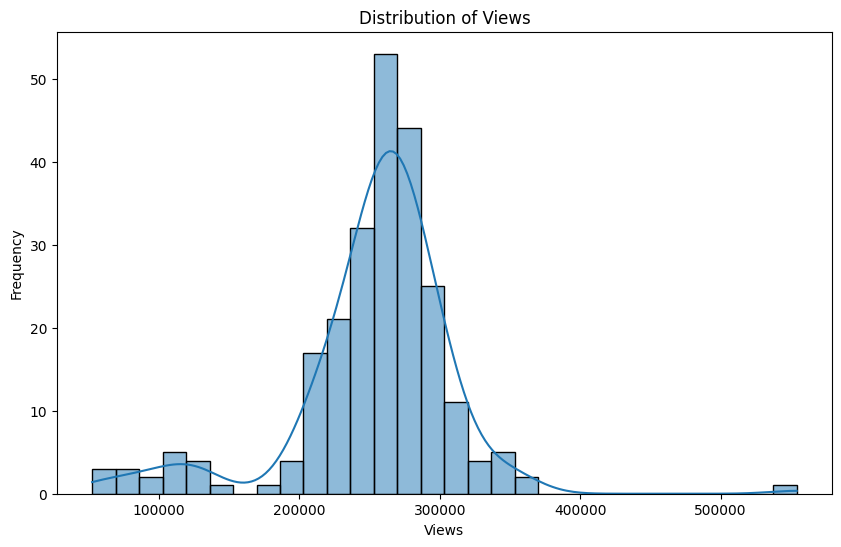

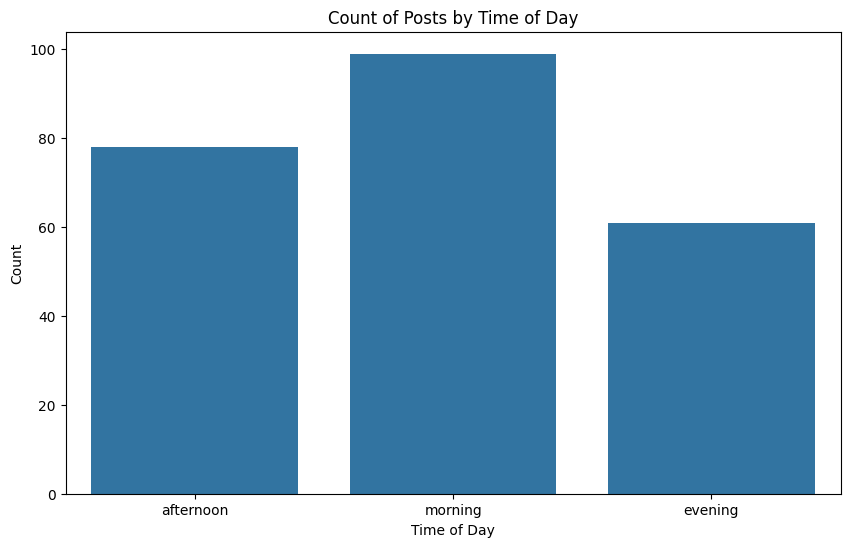

In [13]:
# Plot distributions of individual variables
plt.figure(figsize=(10, 6))
sns.histplot(df['views'], bins=30, kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day', data=df)
plt.title('Count of Posts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

In [15]:
# Data Cleaning
df['keyword'] = df['keyword'].fillna('unknown')
df['views'] = pd.to_numeric(df['views'], errors='coerce').fillna(0).astype(int)
df['date'] = pd.to_datetime(df['date'])

# Convert 'post_hour' to datetime and extract hour
df['post_hour'] = pd.to_datetime(df['post_hour'], format='%H:%M:%S', errors='coerce')
df['hour'] = df['post_hour'].dt.hour

print("Cleaned Data:\n", df.head())
print(df.info())

Cleaned Data:
    id       date                          post_link   views  \
0   1 2024-05-21  https://t.me/tikvahethiopia/87794  211354   
1   2 2024-05-17  https://t.me/tikvahethiopia/87693  240558   
2   3 2024-05-14  https://t.me/tikvahethiopia/87636  249862   
3   4 2024-05-10  https://t.me/tikvahethiopia/87532  280144   
4   5 2024-05-07  https://t.me/tikvahethiopia/87496  304225   

            post_hour                  keyword time_of_day  hour  
0 1900-01-01 12:40:51                  unknown   afternoon    12  
1 1900-01-01 08:08:16  #bank, #bankofabyssinia     morning     8  
2 1900-01-01 07:49:21                    #bank     morning     7  
3 1900-01-01 13:39:46  #bank, #bankofabyssinia   afternoon    13  
4 1900-01-01 10:46:34  #bank, #bankofabyssinia     morning    10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0

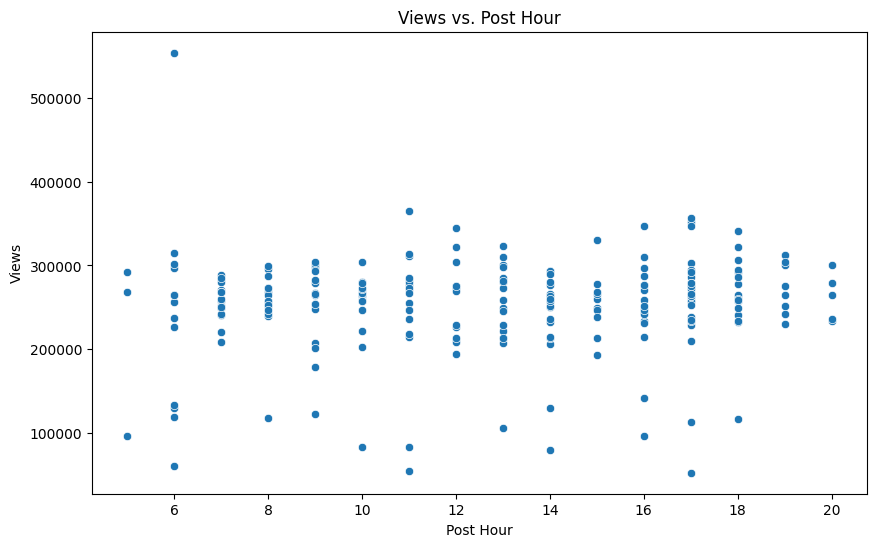

In [16]:
# Scatter plot of views vs. hour
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour', y='views', data=df)
plt.title('Views vs. Post Hour')
plt.xlabel('Post Hour')
plt.ylabel('Views')
plt.show()

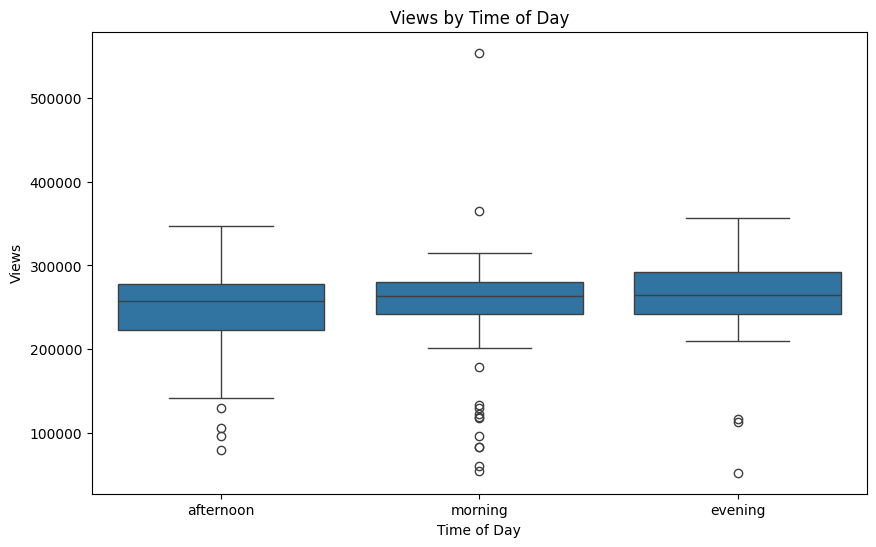

In [17]:
# Box plot of views by time_of_day
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='views', data=df)
plt.title('Views by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Views')
plt.show()

#### Data Enrichment

### Data Comparison

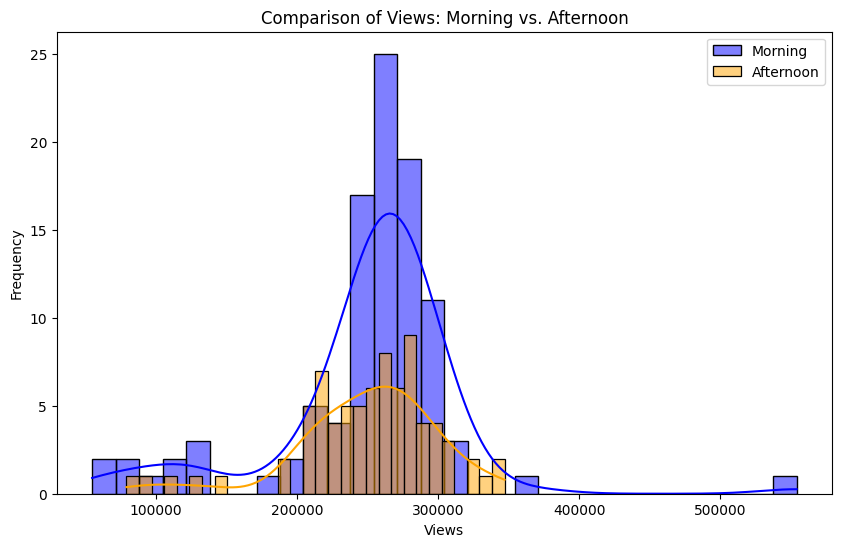

In [18]:
# Compare views between different times of day
views_morning = df[df['time_of_day'] == 'morning']['views']
views_afternoon = df[df['time_of_day'] == 'afternoon']['views']

plt.figure(figsize=(10, 6))
sns.histplot(views_morning, bins=30, kde=True, color='blue', label='Morning')
sns.histplot(views_afternoon, bins=30, kde=True, color='orange', label='Afternoon')
plt.title('Comparison of Views: Morning vs. Afternoon')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.legend()
plt.show()

###  Trends Over Time

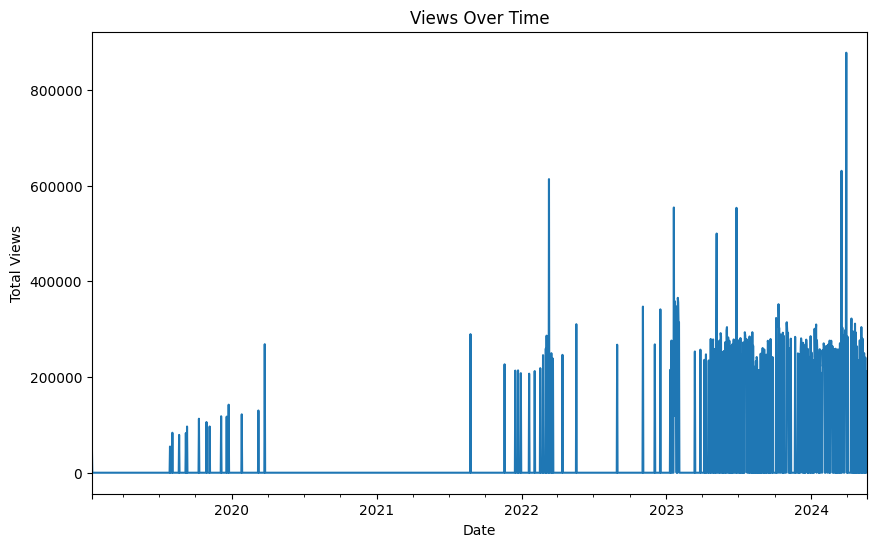

In [19]:
# Views over time
df.set_index('date', inplace=True)
views_over_time = df['views'].resample('D').sum()

plt.figure(figsize=(10, 6))
views_over_time.plot()
plt.title('Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.show()

### Correlation Between Different Datasets

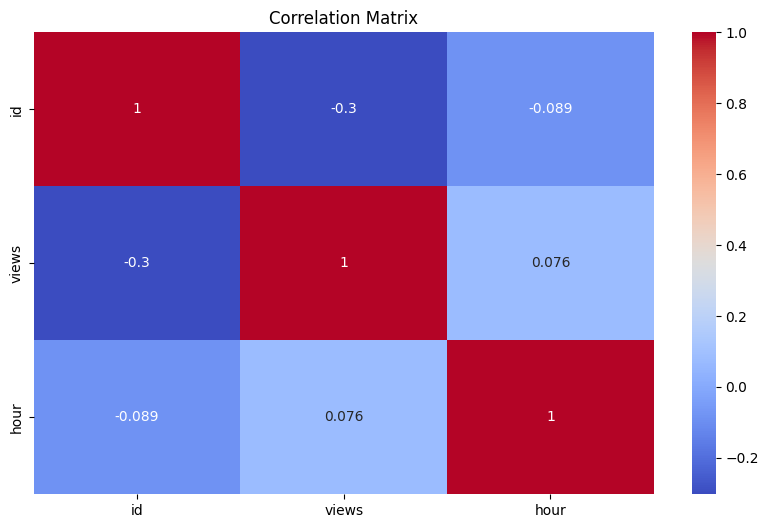

In [22]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Outlier Detection

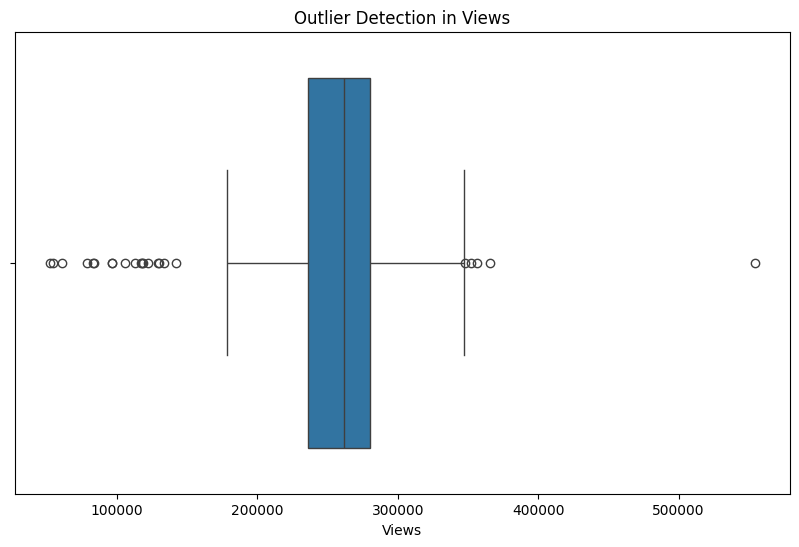

In [23]:
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['views'])
plt.title('Outlier Detection in Views')
plt.xlabel('Views')
plt.show()

### Visualization - Produce creative and informative plots.

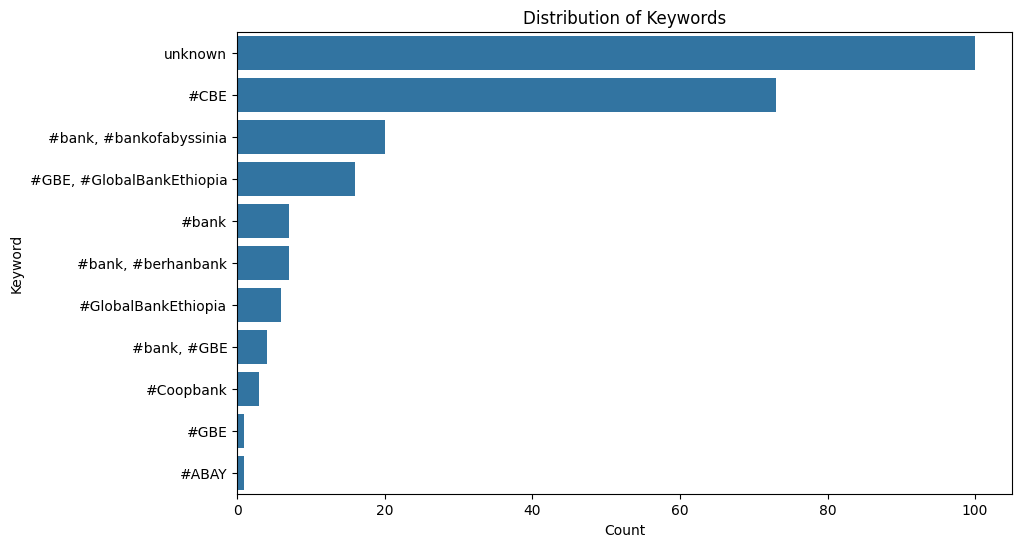

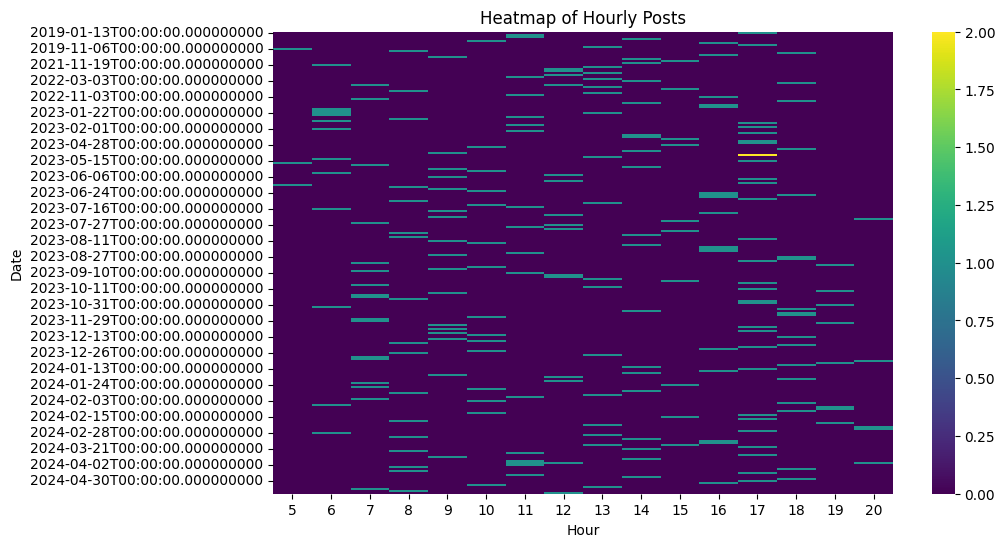

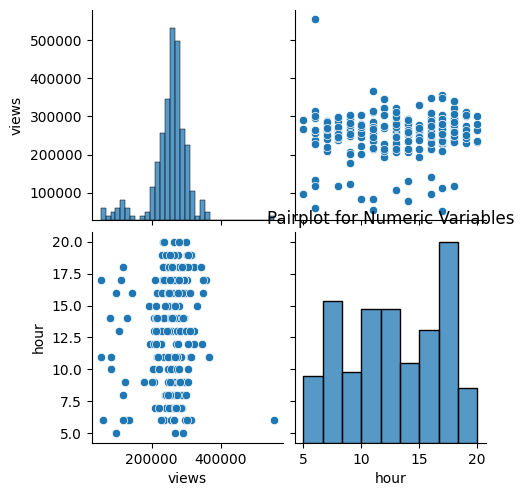

In [25]:
# Additional plots
# Plot 1: Distribution of Keywords
plt.figure(figsize=(10, 6))
sns.countplot(y='keyword', data=df, order=df['keyword'].value_counts().index)
plt.title('Distribution of Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

# Plot 2: Heatmap of Hourly Posts
hourly_posts = df.pivot_table(index='date', columns='hour', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_posts, cmap='viridis')
plt.title('Heatmap of Hourly Posts')
plt.xlabel('Hour')
plt.ylabel('Date')
plt.show()

# Plot 3: Pairplot for Numeric Variables
numeric_df = df[['views', 'hour']]
sns.pairplot(numeric_df)
plt.title('Pairplot for Numeric Variables')
plt.show()